In [1]:
import pandas as pd

In [17]:
REG = pd.read_csv(r"C:\Users\B051733\Downloads\projects-2023-f-m-r-23-main\projects-2023-f-m-r-23-main\dataproject\REGK11.csv",index_col=0)
BEF = pd.read_csv(r"C:\Users\B051733\Downloads\projects-2023-f-m-r-23-main\projects-2023-f-m-r-23-main\dataproject\FOLK1A_behandlet",index_col=0)

In [27]:
BEF.rename(columns={'ÅR':'TID'},inplace=True)

In [28]:
BEF

,TID,OMRÅDE,ALDER,INDHOLD
0,2008,Aabenraa,0,610
1,2008,Aabenraa,1,635
2,2008,Aabenraa,10,766
3,2008,Aabenraa,100,2
4,2008,Aabenraa,101,2
...,...,...,...,...
168253,2023,Ærø,95,4
168254,2023,Ærø,96,7
168255,2023,Ærø,97,4
168256,2023,Ærø,98,2


In [29]:
REG

,OMRÅDE,TID,SUNDHEDSUDGIFTER
0,Hele landet,2008,2659
1,København,2008,2737
2,Frederiksberg,2008,3148
3,Ballerup,2008,3210
4,Brøndby,2008,3168
...,...,...,...
1381,Rebild,2021,5169
1382,Mariagerfjord,2021,5840
1383,Jammerbugt,2021,5756
1384,Aalborg,2021,4707


In [31]:
new_df = pd.merge(BEF, REG,  how='left', left_on=['OMRÅDE','TID'], right_on = ['OMRÅDE','TID'])

In [32]:
new_df

,TID,OMRÅDE,ALDER,INDHOLD,SUNDHEDSUDGIFTER
0,2008,Aabenraa,0,610,2635.0
1,2008,Aabenraa,1,635,2635.0
2,2008,Aabenraa,10,766,2635.0
3,2008,Aabenraa,100,2,2635.0
4,2008,Aabenraa,101,2,2635.0
...,...,...,...,...,...
166654,2023,Ærø,95,4,NaN
166655,2023,Ærø,96,7,NaN
166656,2023,Ærø,97,4,NaN
166657,2023,Ærø,98,2,NaN


In [37]:
samlet_bef = new_df.groupby(['TID','OMRÅDE'])['INDHOLD'].sum()

In [41]:
df_ = pd.merge(new_df, samlet_bef,  how='left', left_on=['OMRÅDE','TID'], right_on = ['OMRÅDE','TID'])

In [43]:
df_.columns = ['TID','KOMMUNE','ALDER','BEFOLKNING','SUNDHEDSUDGIFTER','SAMLET BEFOLKNING']

In [57]:
df_['GAMLE'] = 0 
df_.loc[df_['ALDER']>=60,'GAMLE'] = df_['BEFOLKNING']

In [58]:
df_

,TID,KOMMUNE,ALDER,BEFOLKNING,SUNDHEDSUDGIFTER,SAMLET BEFOLKNING,GAMLE
0,2008,Aabenraa,0,610,2635.0,60284,0
1,2008,Aabenraa,1,635,2635.0,60284,0
2,2008,Aabenraa,10,766,2635.0,60284,0
3,2008,Aabenraa,100,2,2635.0,60284,2
4,2008,Aabenraa,101,2,2635.0,60284,2
...,...,...,...,...,...,...,...
166654,2023,Ærø,95,4,NaN,6008,4
166655,2023,Ærø,96,7,NaN,6008,7
166656,2023,Ærø,97,4,NaN,6008,4
166657,2023,Ærø,98,2,NaN,6008,2


In [65]:
gammel_df = df_.groupby(['TID','KOMMUNE'])['GAMLE'].sum()

In [66]:
gammel_df

TID   KOMMUNE        
2008  Aabenraa           14561
      Aalborg            42502
      Aarhus             53213
      Albertslund         5414
      Allerød             5253
                         ...  
2023  Vejle              30525
      Vesthimmerlands    11754
      Viborg             27318
      Vordingborg        16655
      Ærø                 2811
Name: GAMLE, Length: 1600, dtype: int64

In [71]:
df__ = pd.merge(df_, gammel_df,  how='left', left_on=['KOMMUNE','TID'], right_on = ['KOMMUNE','TID'])
df__.rename(columns={'GAMLE_x':'GAMLE','GAMLE_y':'GAMLE_AKK'},inplace=True)

In [72]:
df__['GAMMEL_ANDEL'] = df__['GAMLE_AKK']/df__['SAMLET BEFOLKNING']

In [73]:
df__

,TID,KOMMUNE,ALDER,BEFOLKNING,SUNDHEDSUDGIFTER,SAMLET BEFOLKNING,GAMLE,GAMLE_AKK,GAMMEL_ANDEL
0,2008,Aabenraa,0,610,2635.0,60284,0,14561,0.241540
1,2008,Aabenraa,1,635,2635.0,60284,0,14561,0.241540
2,2008,Aabenraa,10,766,2635.0,60284,0,14561,0.241540
3,2008,Aabenraa,100,2,2635.0,60284,2,14561,0.241540
4,2008,Aabenraa,101,2,2635.0,60284,2,14561,0.241540
...,...,...,...,...,...,...,...,...,...
166654,2023,Ærø,95,4,NaN,6008,4,2811,0.467876
166655,2023,Ærø,96,7,NaN,6008,7,2811,0.467876
166656,2023,Ærø,97,4,NaN,6008,4,2811,0.467876
166657,2023,Ærø,98,2,NaN,6008,2,2811,0.467876


In [75]:
df__[df__['KOMMUNE']=='Langeland']

,TID,KOMMUNE,ALDER,BEFOLKNING,SUNDHEDSUDGIFTER,SAMLET BEFOLKNING,GAMLE,GAMLE_AKK,GAMMEL_ANDEL
5596,2008,Langeland,0,104,2773.0,13676,0,4719,0.345057
5597,2008,Langeland,1,83,2773.0,13676,0,4719,0.345057
5598,2008,Langeland,10,115,2773.0,13676,0,4719,0.345057
5599,2008,Langeland,100,4,2773.0,13676,4,4719,0.345057
5600,2008,Langeland,101,1,2773.0,13676,1,4719,0.345057
...,...,...,...,...,...,...,...,...,...
161984,2023,Langeland,95,9,NaN,12384,9,5637,0.455184
161985,2023,Langeland,96,18,NaN,12384,18,5637,0.455184
161986,2023,Langeland,97,10,NaN,12384,10,5637,0.455184
161987,2023,Langeland,98,5,NaN,12384,5,5637,0.455184


In [88]:
data_done = df__.groupby(['KOMMUNE','TID'])['SUNDHEDSUDGIFTER','GAMMEL_ANDEL'].mean().reset_index()

C:\Users\B051733\AppData\Local\Temp\ipykernel_10172\292131542.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_done = df__.groupby(['KOMMUNE','TID'])['SUNDHEDSUDGIFTER','GAMMEL_ANDEL'].mean().reset_index()


In [90]:
data_done

,KOMMUNE,TID,SUNDHEDSUDGIFTER,GAMMEL_ANDEL
0,Aabenraa,2008,2635.0,0.241540
1,Aabenraa,2009,3074.0,0.245583
2,Aabenraa,2010,3309.0,0.256771
3,Aabenraa,2011,3424.0,0.259713
4,Aabenraa,2012,4916.0,0.265919
...,...,...,...,...
1595,Ærø,2019,6872.0,0.456852
1596,Ærø,2020,7224.0,0.459419
1597,Ærø,2021,7382.0,0.459531
1598,Ærø,2022,NaN,0.462164


In [87]:
import matplotlib.pyplot as plt

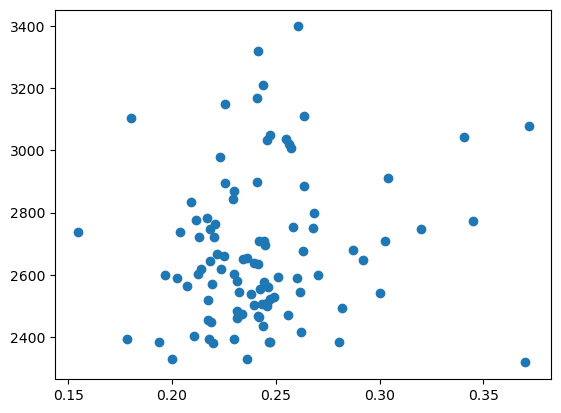

In [92]:
year = 2008

fig, ax = plt.subplots(dpi=100)

xx = data_done.loc[data_done['TID']==year]['GAMMEL_ANDEL']
yy = data_done.loc[data_done['TID']==year]['SUNDHEDSUDGIFTER']
ax.scatter(xx,yy)

plt.show()